In [1]:
sys.path.insert(0, '/home/shengq2/program/spcount/src')

import pandas as pd
#from spcount.common_util import readFileMap

In [2]:
rootDir='/scratch/vickers_lab/projects/20220509_smRNA_6254_AC_samples_1_13_redo/refseq_bacteria_table'
countFile=f"{rootDir}/smRNA_6254_AC_redo.species.estimated.count"
outputFile=f"{rootDir}/smRNA_6254_AC_redo.shannon.txt"

In [5]:
count_data = pd.read_csv(countFile, sep="\t", index_col=0)
count_data.head()

,170DH,210AC,355VH,433JG,515KS,532PR,651AK,671HS,681JS,690MB,693AB,709WC,735TM
Feature,,,,,,,,,,,,,
Duganella callida,16441.42,11847.47,42079.95,62800.09,238602.18,184120.54,286276.20,135261.94,18622.20,9004.04,105642.28,6364.42,406064.99
Planctomonas deserti,11877.55,6106.31,26570.37,37872.30,186230.93,131977.51,207881.27,89517.22,23225.30,9488.97,81158.46,4707.53,279001.76
Blastomonas marina,5701.68,3236.02,15906.38,24189.68,92741.10,68738.10,114087.26,47117.36,12855.03,3278.50,45502.68,2467.34,151742.20
Absicoccus porci,17537.74,9089.69,36030.38,58104.75,213215.26,167502.32,241248.99,131676.01,14797.12,5633.50,77832.47,5774.80,360286.44
Acinetobacter courvalinii,5405.38,1712.72,14483.19,21344.43,83408.30,64466.49,98916.19,44244.69,6696.52,3159.31,43224.11,2274.82,137950.85


In [6]:
perc_count = count_data.div(count_data.sum(axis=0), axis=1)
perc_count.head()

,170DH,210AC,355VH,433JG,515KS,532PR,651AK,671HS,681JS,690MB,693AB,709WC,735TM
Feature,,,,,,,,,,,,,
Duganella callida,0.048353,0.036534,0.045308,0.034557,0.049454,0.051823,0.049352,0.049810,0.009425,0.024338,0.041327,0.050361,0.055304
Planctomonas deserti,0.034931,0.018830,0.028609,0.020840,0.038599,0.037147,0.035837,0.032965,0.011755,0.025649,0.031749,0.037250,0.037999
Blastomonas marina,0.016768,0.009979,0.017127,0.013311,0.019222,0.019347,0.019668,0.017351,0.006506,0.008862,0.017800,0.019524,0.020667
Absicoccus porci,0.051577,0.028030,0.038794,0.031973,0.044192,0.047146,0.041589,0.048490,0.007489,0.015227,0.030448,0.045695,0.049069
Acinetobacter courvalinii,0.015897,0.005281,0.015594,0.011745,0.017288,0.018145,0.017052,0.016293,0.003389,0.008540,0.016909,0.018000,0.018788


In [9]:
import numpy as np

def shannon_value(x):
    return -(x * np.log(x))
  
s_values = perc_count.applymap(shannon_value)
s_values.head()
s_values.describe()

/tmp/ipykernel_30683/3120744521.py:4: RuntimeWarning: divide by zero encountered in log
  return -(x * np.log(x))
/tmp/ipykernel_30683/3120744521.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return -(x * np.log(x))


,170DH,210AC,355VH,433JG,515KS,532PR,651AK,671HS,681JS,690MB,693AB,709WC,735TM
count,1.448900e+04,1.261700e+04,1.442400e+04,1.447500e+04,1.449300e+04,1.450200e+04,1.448200e+04,1.449800e+04,1.446500e+04,1.447900e+04,1.449600e+04,14502.000000,1.450500e+04
mean,4.368194e-04,4.927263e-04,4.394121e-04,4.558658e-04,4.345281e-04,4.387158e-04,4.349728e-04,4.510708e-04,4.987265e-04,4.853874e-04,4.424090e-04,0.000442,4.312105e-04
std,3.154056e-03,3.162882e-03,3.090290e-03,2.741827e-03,3.208930e-03,3.165905e-03,3.193079e-03,3.059648e-03,2.251773e-03,2.561891e-03,2.983489e-03,0.003203,3.296079e-03
min,5.100100e-07,5.333070e-07,1.975420e-07,1.046491e-07,4.144127e-08,5.541588e-08,3.478643e-08,7.151304e-08,9.667755e-08,4.710357e-07,7.573229e-08,0.000001,2.930277e-07
25%,2.943425e-05,1.023865e-06,2.770944e-05,1.234678e-05,3.335145e-05,2.911190e-05,2.496407e-05,2.983462e-05,3.375334e-05,3.561311e-05,1.617428e-05,0.000050,4.482163e-05
50%,7.116306e-05,1.910124e-05,6.985383e-05,2.900286e-05,6.928402e-05,6.410058e-05,6.161226e-05,6.750676e-05,9.905541e-05,7.512383e-05,3.705459e-05,0.000093,8.101657e-05
75%,1.657057e-04,1.736295e-04,1.901479e-04,1.204782e-04,1.798554e-04,1.729919e-04,1.857826e-04,2.168715e-04,2.597845e-04,2.706432e-04,1.451279e-04,0.000212,1.913272e-04
max,1.529088e-01,1.209090e-01,1.401953e-01,1.162882e-01,1.486932e-01,1.533927e-01,1.484887e-01,1.494076e-01,1.186340e-01,1.277449e-01,1.316771e-01,0.150505,1.601000e-01


In [10]:
shannon_values=s_values.sum(axis=0)
shannon_values.head()

170DH    6.329076
210AC    6.216728
355VH    6.338080
433JG    6.598658
515KS    6.297616
dtype: float64

In [20]:
shannon_values.name = "shannon"
shannon_values.index.name = "sample"
shannon_values

sample
170DH    6.329076
210AC    6.216728
355VH    6.338080
433JG    6.598658
515KS    6.297616
532PR    6.362256
651AK    6.299276
671HS    6.539624
681JS    7.214079
690MB    7.027924
693AB    6.413161
709WC    6.404934
735TM    6.254709
Name: shannon, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a973e6220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a973e6880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a973d7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a973e6d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a97375070>],
 'means': []}

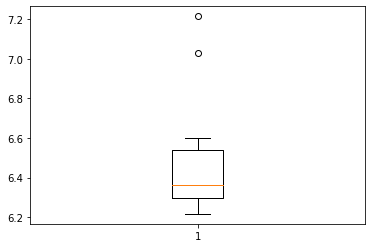

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(shannon_values)